<a href="https://colab.research.google.com/github/Adhishreya/Parkinson-s-Disease-Detection/blob/main/Parkinson(final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import  XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler#for scaling values for svm
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
warnings.filterwarnings('ignore')

###dataset
https://archive.ics.uci.edu/ml/datasets/Parkinsons

In [ ]:
df=pd.read_csv("parkinsons.csv")

In [ ]:
df.head().T

,0,1,2,3,4
name,phon_R01_S01_1,phon_R01_S01_2,phon_R01_S01_3,phon_R01_S01_4,phon_R01_S01_5
MDVP:Fo(Hz),119.992,122.4,116.682,116.676,116.014
MDVP:Fhi(Hz),157.302,148.65,131.111,137.871,141.781
MDVP:Flo(Hz),74.997,113.819,111.555,111.366,110.655
MDVP:Jitter(%),0.00784,0.00968,0.0105,0.00997,0.01284
MDVP:Jitter(Abs),7e-05,8e-05,9e-05,9e-05,0.00011
MDVP:RAP,0.0037,0.00465,0.00544,0.00502,0.00655
MDVP:PPQ,0.00554,0.00696,0.00781,0.00698,0.00908
Jitter:DDP,0.01109,0.01394,0.01633,0.01505,0.01966
MDVP:Shimmer,0.04374,0.06134,0.05233,0.05492,0.06425


In [ ]:
df.shape

(195, 24)

In [ ]:
df=df.drop("name",axis=1)

#Exploratory data analysis

In [ ]:
#checking the datatype of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

In [ ]:
df.isna().sum()
#absence of null values

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [ ]:
col=df.columns
variance=[round(df[x].var(),2) for x in col[:]]
median=[df[x].median() for x in col[:]]
Stat=pd.DataFrame(data=[median,variance] ,columns=col[:],index=["median","variance"])
Stat.T

,median,variance
MDVP:Fo(Hz),148.790000,1713.14
MDVP:Fhi(Hz),175.829000,8370.70
MDVP:Flo(Hz),104.315000,1894.11
MDVP:Jitter(%),0.004940,0.00
MDVP:Jitter(Abs),0.000030,0.00
MDVP:RAP,0.002500,0.00
MDVP:PPQ,0.002690,0.00
Jitter:DDP,0.007490,0.00
MDVP:Shimmer,0.022970,0.00
MDVP:Shimmer(dB),0.221000,0.04


#Dropping features having zero variance

In [ ]:
col=df.columns
df=df.drop([x for x in col[:] if round(df[x].var(),2)==0.00000	],axis=1)
col=df.columns
#removing the columns having 0 variance

In [ ]:
#columns retained after removing zero variance variables
col

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Shimmer(dB)',
       'HNR', 'status', 'RPDE', 'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

###Outliers detection

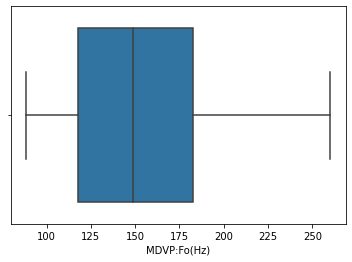

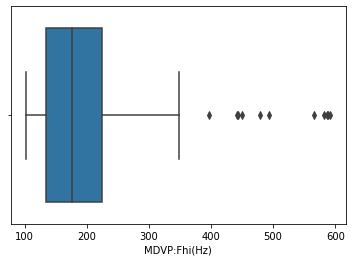

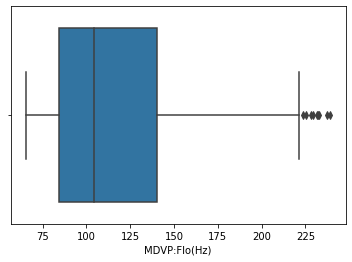

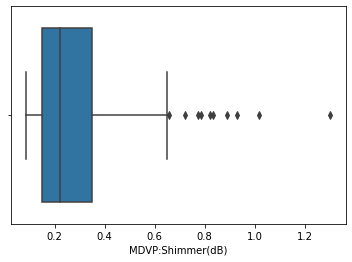

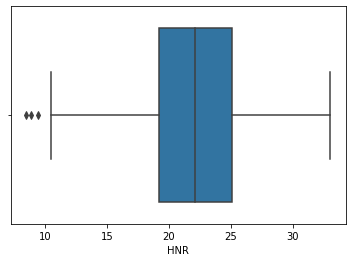

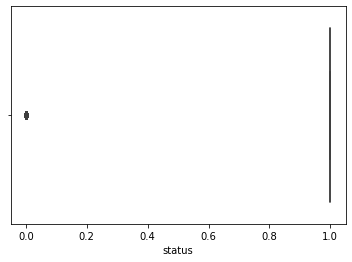

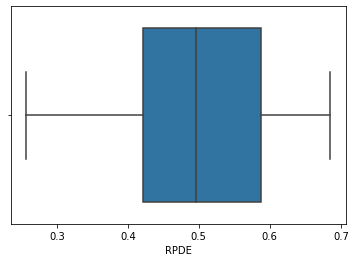

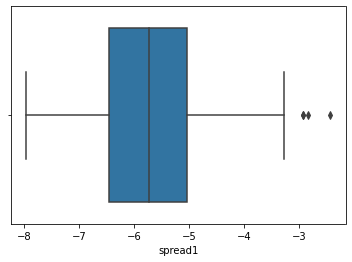

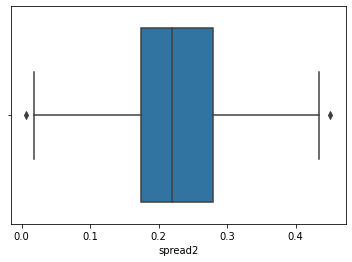

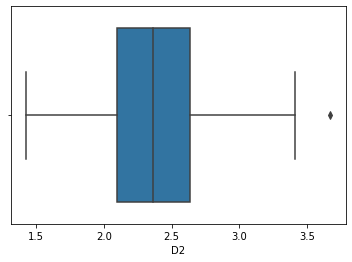

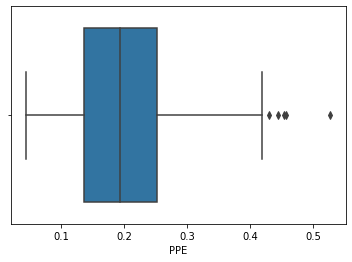

In [ ]:
for x in col[:]:
  plt.figure()
  sns.boxplot(df[x])

In [ ]:
cols=df.columns.drop("status")
cols

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Shimmer(dB)',
       'HNR', 'RPDE', 'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

#Outlier treatment

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

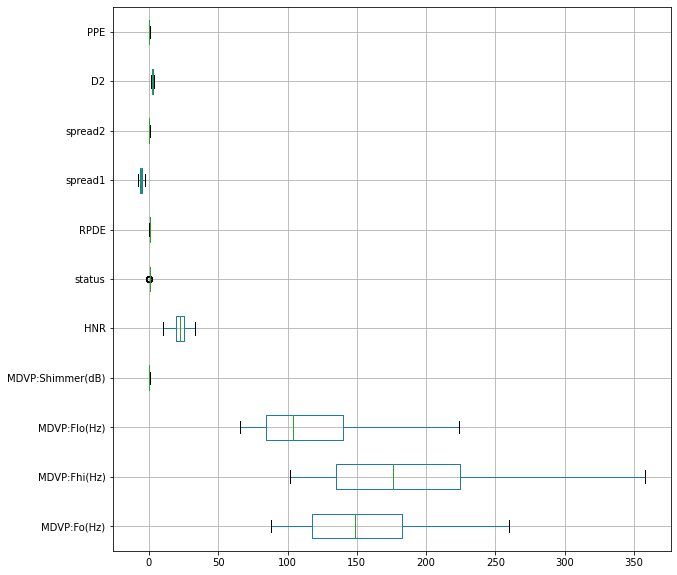

In [ ]:
for column in cols:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])
plt.figure(figsize=(10,10))
df.iloc[:, :].boxplot(vert=0)

#Multivariate analysis

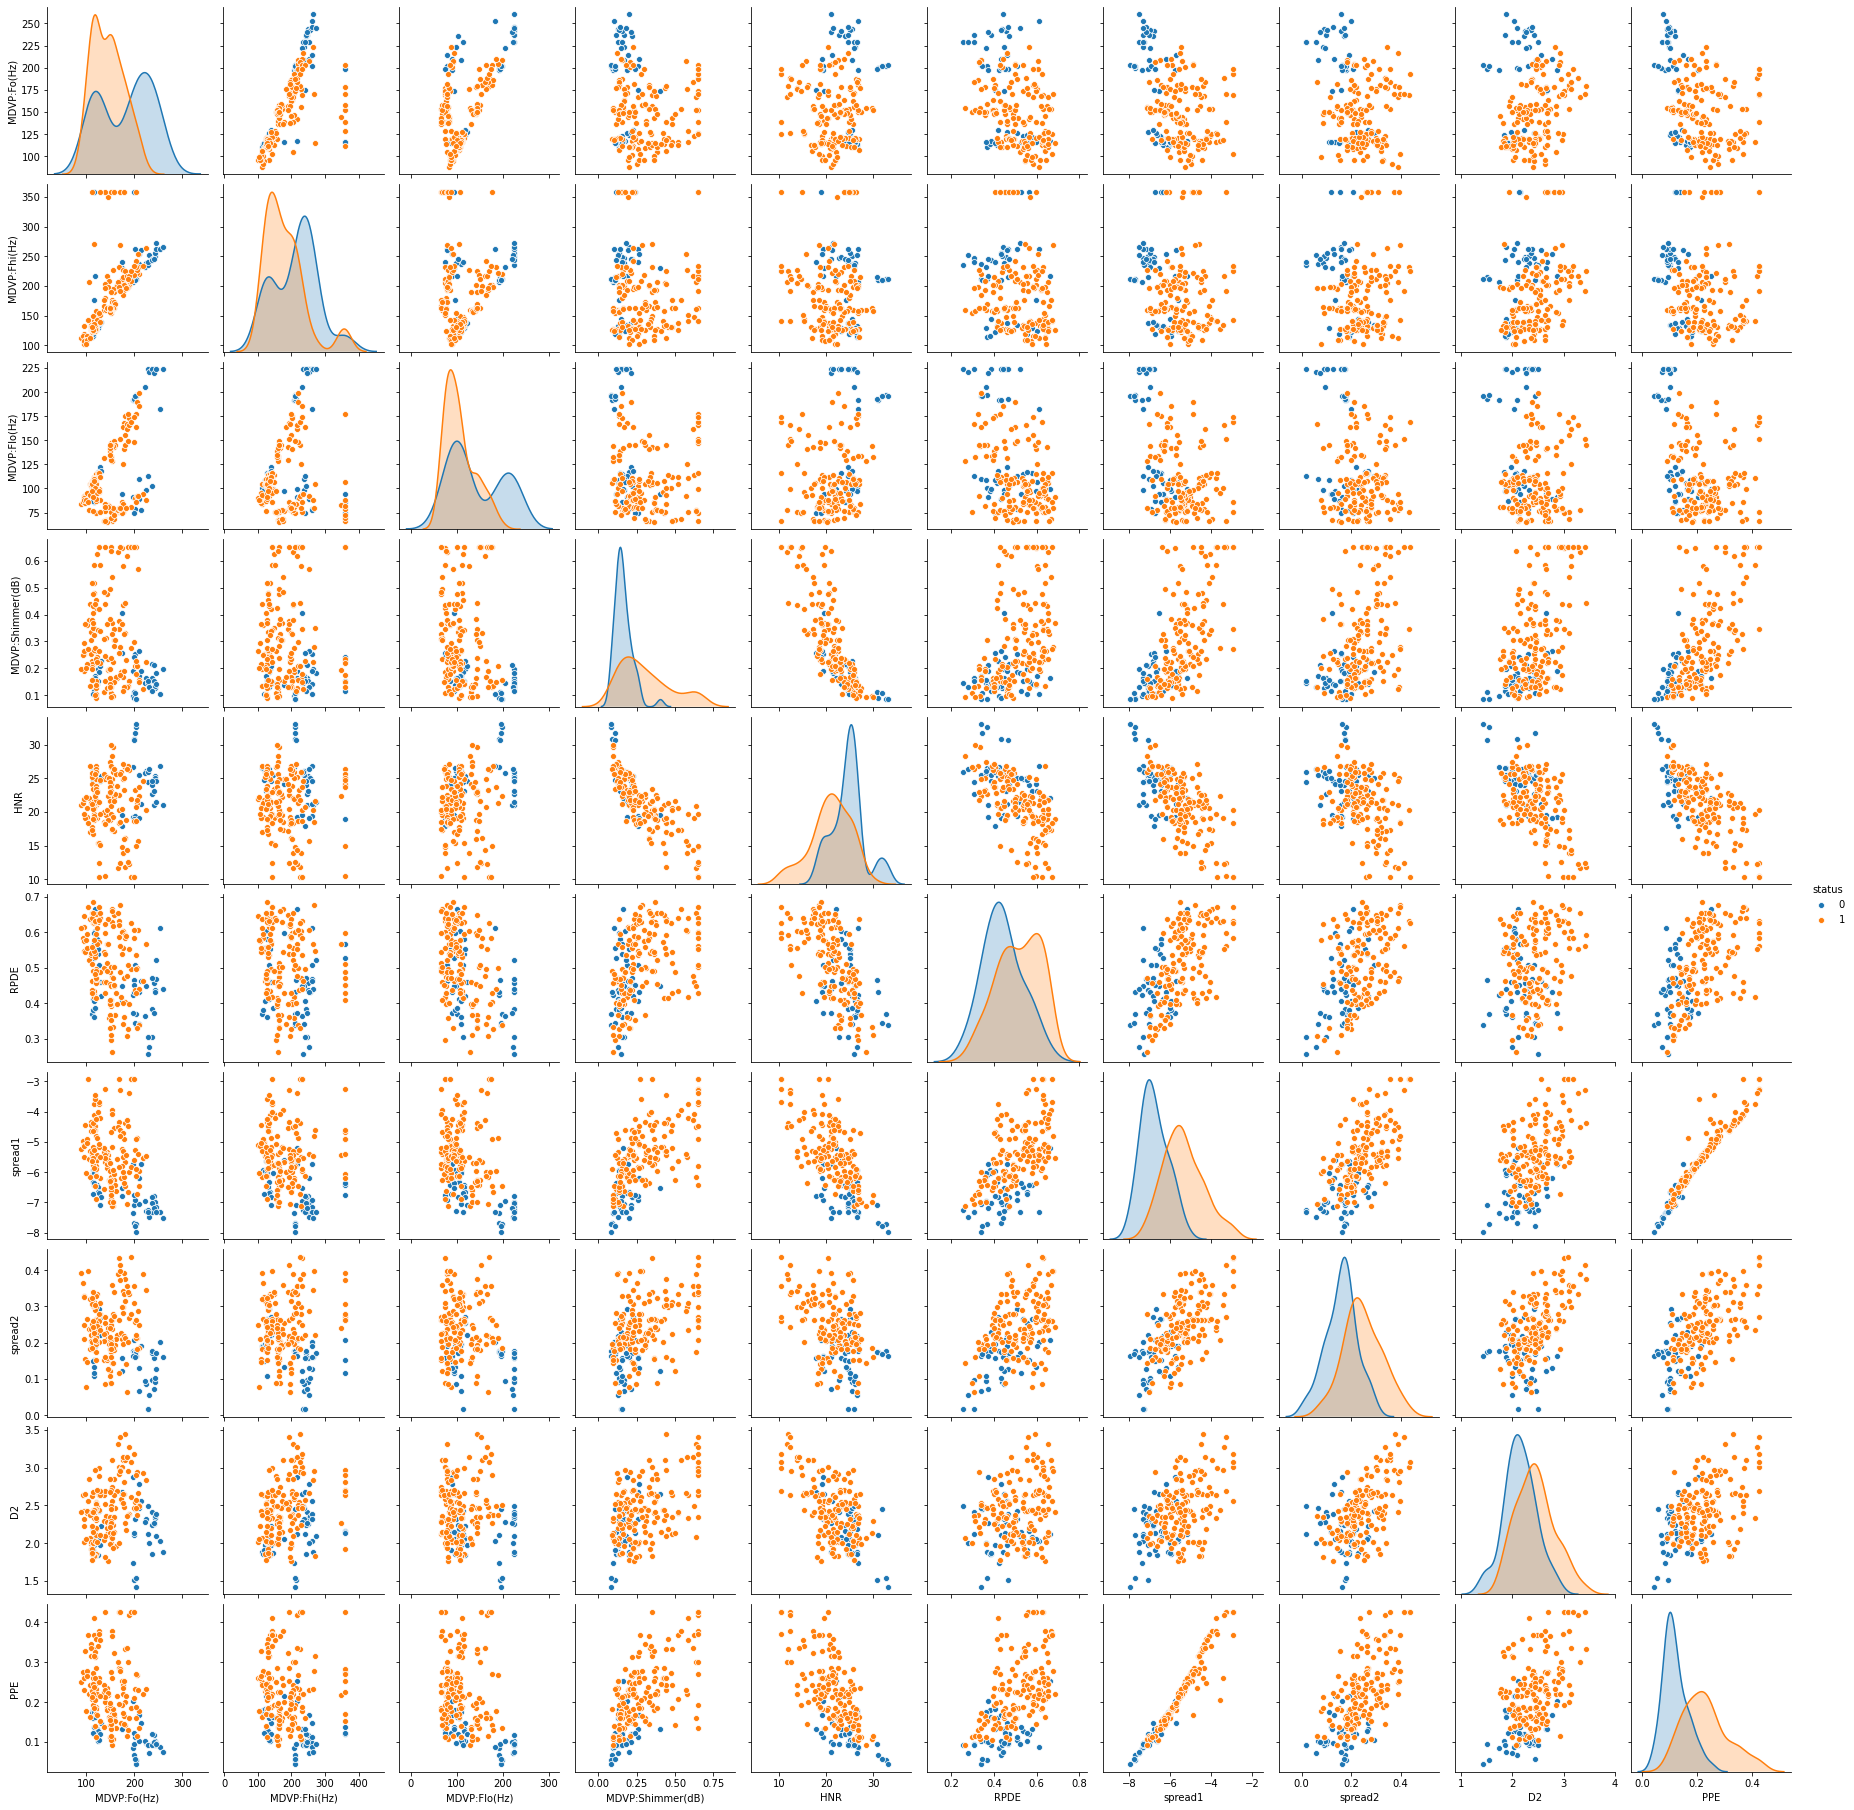

In [ ]:
#pairplot provides analysis of an individual variable distribution as well as their variations 
#with other variables
sns.pairplot(df,hue='status')

In [ ]:
col=df.columns


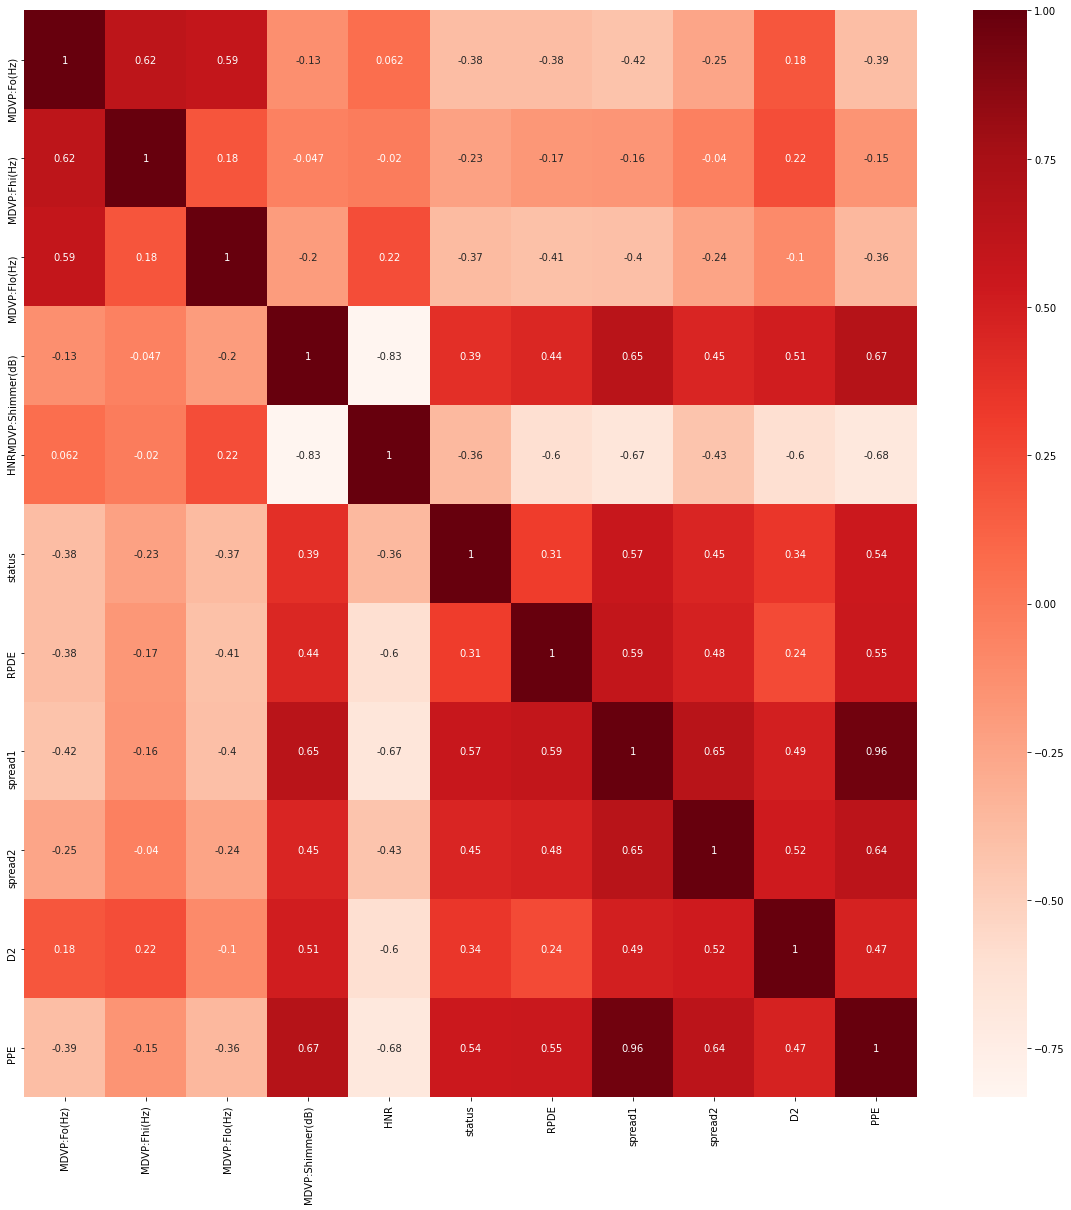

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
X=df.drop("status",axis=1)
Y=df["status"]
print(Y.value_counts())

1    147
0     48
Name: status, dtype: int64


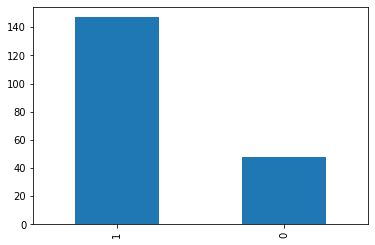

In [ ]:
Y.value_counts().plot.bar()

#Scaling values

In [ ]:
X=StandardScaler().fit_transform(X)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=10)

#Logistic Regression

In [ ]:
log=LogisticRegression().fit(X_train,Y_train)
Y_pred=log.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9387755102040817

##using different c for logistic regression


parameter c controls the amount of regularisation
higher value of c represents less regularisation
and tries to fit the training set as well as possible

smaller values of C ,more is the regularisation 

default value is 1

In [ ]:
c=[1,100,0.1,0.75,10,5,0.01,0.001,0.00001]
accuracy=[]
f1=[]
for c_val in c:
  log=LogisticRegression(penalty='l2',max_iter=100,C=c_val,class_weight='balanced').fit(X_train,Y_train)
  Y_pred=log.predict(X_test)
  accuracy.append(accuracy_score(Y_test,Y_pred))
  f1.append(f1_score(Y_test,Y_pred))
performance=pd.DataFrame(({"accuracy":accuracy,"f1_score":f1,"C":c}))
performance


,accuracy,f1_score,C
0,0.877551,0.911765,1.00000
1,0.877551,0.911765,100.00000
2,0.877551,0.911765,0.10000
3,0.877551,0.911765,0.75000
4,0.877551,0.911765,10.00000
5,0.877551,0.911765,5.00000
6,0.857143,0.898551,0.01000
7,0.857143,0.898551,0.00100
8,0.775510,0.819672,0.00001


In [ ]:
#for c=0.5 and max_iter=150
log=LogisticRegression(max_iter=200,C=0.75).fit(X_train,Y_train)
Y_pred=log.predict(X_test)
print("accuracy={}\n f1 score={}".format(accuracy_score(Y_test,Y_pred),f1_score(Y_test,Y_pred)))

accuracy=0.9387755102040817
 f1 score=0.9589041095890412


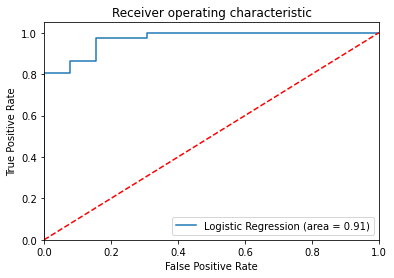

In [ ]:
logit_roc_auc = roc_auc_score(Y_test, log.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, log.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.95      0.97      0.96        36

    accuracy                           0.94        49
   macro avg       0.93      0.91      0.92        49
weighted avg       0.94      0.94      0.94        49



In [ ]:
confusion_matrix(Y_test,Y_pred,normalize='true')

array([[0.84615385, 0.15384615],
       [0.02777778, 0.97222222]])

In [ ]:
col

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Shimmer(dB)',
       'HNR', 'status', 'RPDE', 'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

#SVM

In [ ]:
svmc=SVC().fit(X_train,Y_train)
Y_pred=svmc.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9591836734693877

In [ ]:
roc_auc_score(Y_test,Y_pred)

0.9230769230769231

In [ ]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.95      1.00      0.97        36

    accuracy                           0.96        49
   macro avg       0.97      0.92      0.94        49
weighted avg       0.96      0.96      0.96        49



In [ ]:
confusion_matrix(Y_test,Y_pred,normalize='true')

array([[0.84615385, 0.15384615],
       [0.        , 1.        ]])

In [ ]:
f1_score(Y_test,Y_pred)


0.972972972972973

##Hyper-parameter tuning using Gridsearch



In [ ]:
kernel=["linear","rbf","poly"]
c=[0.1,0.5,10,5,10,1,100]
gamma= [0.001,0.005, 0.01, 0.1, 1, 10,100]
# [1, 0.1, 0.001, 0.02]
params={'kernel':kernel,'C':c,'gamma':gamma}

In [ ]:
random=GridSearchCV(estimator=svmc, param_grid=params,verbose=0,cv=5,refit=True,scoring='accuracy')
random.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.5, 10, 5, 10, 1, 100],
                         'gamma': [0.001, 0.005, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
#finding the best hyperparameters
print(random.best_params_)


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
svmc=SVC(C=10,kernel='rbf',gamma=0.1).fit(X_train,Y_train)
Y_pred=svmc.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9183673469387755

In [ ]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        13
           1       0.94      0.94      0.94        36

    accuracy                           0.92        49
   macro avg       0.90      0.90      0.90        49
weighted avg       0.92      0.92      0.92        49



In [ ]:
confusion_matrix(Y_test,Y_pred,normalize='true')

array([[0.84615385, 0.15384615],
       [0.05555556, 0.94444444]])

In [ ]:
f1_score(Y_test,Y_pred)

0.9444444444444444

#k-nearest neighbors

In [ ]:
knn=KNeighborsClassifier().fit(X_train,Y_train)
pred=knn.predict(X_test)
acc=accuracy_score(Y_test,pred)
print("accuracy= ",acc)
print(classification_report(Y_test,pred))


accuracy=  0.8571428571428571
              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.87      0.94      0.91        36

    accuracy                           0.86        49
   macro avg       0.84      0.78      0.80        49
weighted avg       0.85      0.86      0.85        49



In [ ]:
confusion_matrix(Y_test,pred,normalize='true')

array([[0.61538462, 0.38461538],
       [0.05555556, 0.94444444]])

###Hyper parameter tuning

In [ ]:
neighbours=[1,3,5,11,13,7,9]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
params={'n_neighbors':neighbours,'weights':weights,'metric':metric}

In [ ]:
random=GridSearchCV(estimator=knn, param_grid=params,verbose=0,refit=True,scoring='accuracy')
random.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 3, 5, 11, 13, 7, 9],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
roc_auc_score(Y_test,Y_pred)

0.8952991452991452

In [ ]:
#finding the best hyperparameters
print(random.best_params_) 

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}


In [ ]:
knn=KNeighborsClassifier(n_neighbors=3,metric='manhattan',weights='uniform').fit(X_train,Y_train)
pred=knn.predict(X_test)
acc=accuracy_score(Y_test,pred)
print("accuracy= ",acc)
print(classification_report(Y_test,pred))

accuracy=  0.9387755102040817
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.95      0.97      0.96        36

    accuracy                           0.94        49
   macro avg       0.93      0.91      0.92        49
weighted avg       0.94      0.94      0.94        49



In [ ]:
f1_score(Y_test,pred)

0.9589041095890412

In [ ]:
confusion_matrix(Y_test,pred,normalize='true')

array([[0.84615385, 0.15384615],
       [0.02777778, 0.97222222]])

#Random Forest

In [ ]:
rndf=RandomForestClassifier(n_estimators=100).fit(X_train,Y_train)
Y_pred=rndf.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9183673469387755

#tuning  using Grid search to improve the model performance

In [ ]:
n_estimators = [8,9,10, 100, 1000,500,200]
max_features = ['sqrt', 'log2',4,7,9]
depth=[5,20,30]
grid = dict(n_estimators=n_estimators,max_features=max_features,max_depth=depth)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=rndf, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train,Y_train)
 
print(grid_result.best_params_)

{'max_depth': 30, 'max_features': 'log2', 'n_estimators': 100}


In [ ]:
rndf=RandomForestClassifier(n_estimators=100,max_features='sqrt',max_depth=20,random_state=12,bootstrap=True).fit(X_train,Y_train)
Y_pred=rndf.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9387755102040817

In [ ]:
roc_auc_score(Y_test,Y_pred)

0.9091880341880342

In [ ]:
f1_score(Y_test,Y_pred)

0.9589041095890412

In [ ]:
confusion_matrix(Y_test,Y_pred,normalize='true')

array([[0.84615385, 0.15384615],
       [0.02777778, 0.97222222]])

#XGB

In [ ]:
xgb=XGBClassifier(n_estimators=100).fit(X_train,Y_train)
Y_pred=xgb.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9183673469387755

In [ ]:
f1_score(Y_test,pred)

0.9589041095890412

In [ ]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.95      0.97      0.96        36

    accuracy                           0.94        49
   macro avg       0.93      0.91      0.92        49
weighted avg       0.94      0.94      0.94        49



In [ ]:
confusion_matrix(Y_test,Y_pred,normalize='true')

array([[0.84615385, 0.15384615],
       [0.05555556, 0.94444444]])

#Cross validation

In [ ]:
from sklearn.model_selection import KFold,cross_val_score
kfold=KFold(n_splits=3,random_state=7)
lis=[log,svmc,knn,rndf,xgb]
score=[]
for i in lis:
  result=cross_val_score(i,X,Y,cv=kfold,scoring='accuracy')
  score.append(result.mean())
# print(result.mean())
Performance=pd.DataFrame(data=score,index=["logistic_reg","Svmc","knn","rndf","xgb"])
Performance

,0
logistic_reg,0.774359
Svmc,0.753846
knn,0.805128
rndf,0.789744
xgb,0.851282



###correcting class imbalance

In [ ]:
sm = SMOTE(random_state=12,ratio=1.0)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train.ravel())

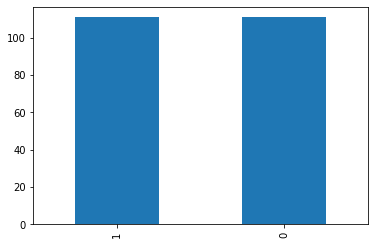

In [ ]:
pd.Series(Y_train_res).value_counts().plot.bar()

In [ ]:
log=LogisticRegression().fit(X_train_res,Y_train_res)
Y_pred=log.predict(X_test)
print("accuracy",accuracy_score(Y_test,Y_pred))
confusion_matrix(Y_test,Y_pred,normalize='true')

accuracy 0.8775510204081632


array([[0.92307692, 0.07692308],
       [0.13888889, 0.86111111]])

In [ ]:
f1_score(Y_test,Y_pred)

0.911764705882353

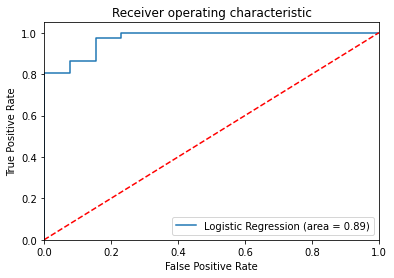

In [ ]:
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(Y_test, log.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, log.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
svmc=SVC().fit(X_train_res,Y_train_res)
Y_pred=svmc.predict(X_test)
print("accuracy",accuracy_score(Y_test,Y_pred))
confusion_matrix(Y_test,Y_pred,normalize='true')

accuracy 0.8979591836734694


array([[1.        , 0.        ],
       [0.13888889, 0.86111111]])

In [ ]:
f1_score(Y_test,Y_pred)

0.9253731343283582

In [ ]:
kernel=["linear","rbf","poly"]
C= np.logspace(-2, 10, 13)
gamma= np.logspace(-9, 3, 13)
# [1, 0.1, 0.001, 0.02]
params={'kernel':kernel,'C':c,'gamma':gamma}

#tuning after smote


In [ ]:
random=GridSearchCV(estimator=svmc, param_grid=params,verbose=0,cv=5,refit=True,scoring='f1')
random.fit(X_train_res,Y_train_res)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.5, 10, 5, 10, 1, 100],
                         'gamma': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [ ]:
#finding the best hyperparameters
print(random.best_params_)


{'C': 10, 'gamma': 1.0, 'kernel': 'rbf'}


In [ ]:
svmc=SVC(C=10, kernel='rbf',gamma=1).fit(X_train_res,Y_train_res)
Y_pred=svmc.predict(X_test)
print("accuracy",accuracy_score(Y_test,Y_pred))
confusion_matrix(Y_test,Y_pred,normalize='true')

accuracy 0.7959183673469388


array([[0.30769231, 0.69230769],
       [0.02777778, 0.97222222]])

In [ ]:
knn=KNeighborsClassifier(n_neighbors=1).fit(X_train_res,Y_train_res)
pred=knn.predict(X_test)
acc=accuracy_score(Y_test,pred)
print("accuracy= ",acc)
print(confusion_matrix(Y_test,Y_pred,normalize='true'))

accuracy=  0.9183673469387755
[[0.30769231 0.69230769]
 [0.02777778 0.97222222]]


In [ ]:
f1_score(Y_test,Y_pred)

0.875

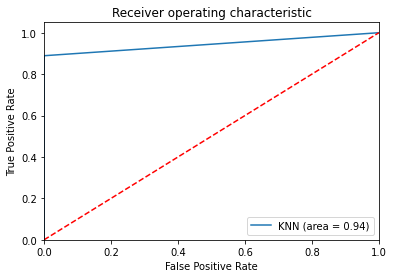

In [ ]:
from sklearn.metrics import roc_curve

knn_roc_auc = roc_auc_score(Y_test, knn.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
rndf=RandomForestClassifier(n_estimators=100).fit(X_train_res,Y_train_res)
Y_pred=rndf.predict(X_test)
print("accuracy",accuracy_score(Y_test,Y_pred))
confusion_matrix(Y_test,Y_pred,normalize='true')

accuracy 0.9183673469387755


array([[0.92307692, 0.07692308],
       [0.08333333, 0.91666667]])

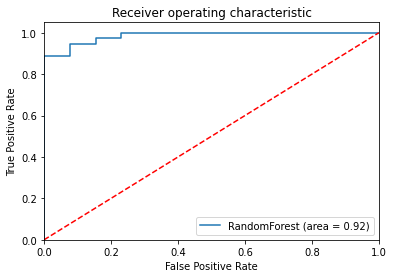

In [ ]:
rndf_roc_auc = roc_auc_score(Y_test, rndf.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, rndf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rndf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
f1_score(Y_test,Y_pred)

0.9428571428571428

In [ ]:
xgb=XGBClassifier(n_estimators=100).fit(X_train_res,Y_train_res)
Y_pred=xgb.predict(X_test)
accuracy_score(Y_test,Y_pred)
print("accuracy",accuracy_score(Y_test,Y_pred))
confusion_matrix(Y_test,Y_pred,normalize='true')

accuracy 0.9183673469387755


array([[0.84615385, 0.15384615],
       [0.05555556, 0.94444444]])

In [ ]:
f1_score(Y_test,Y_pred)

0.9444444444444444

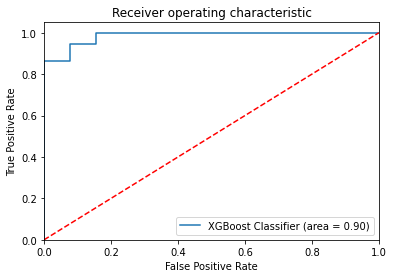

In [ ]:
xgb_roc_auc = roc_auc_score(Y_test, xgb.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, xgb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost Classifier (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()